In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


Text(0, 0.5, 'price')

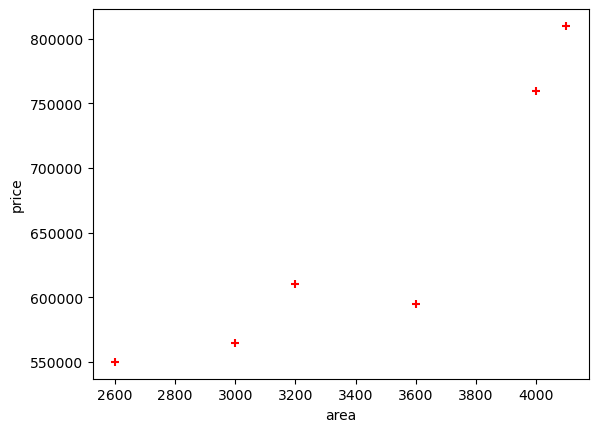

In [3]:
plt.scatter(df.area,df.price,color='red',marker='+')
plt.xlabel('area')
plt.ylabel('price')

In [4]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [42]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df.head(10)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [70]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X.shape,y.size

((6, 3), 6)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_test.size, y_test.size, X_train.size,y_train.size 

(6, 2, 12, 4)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
lr.coef_, lr.intercept_

(array([    236.25, -175125.  ,  -19125.  ]), 843624.9999999998)

In [52]:
y_pred = lr.predict(X_test)
error = y_pred - y_test
error

array([-201500.,  -55125.])

In [54]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

-1.1820507812499814

ValueError: x and y must be the same size

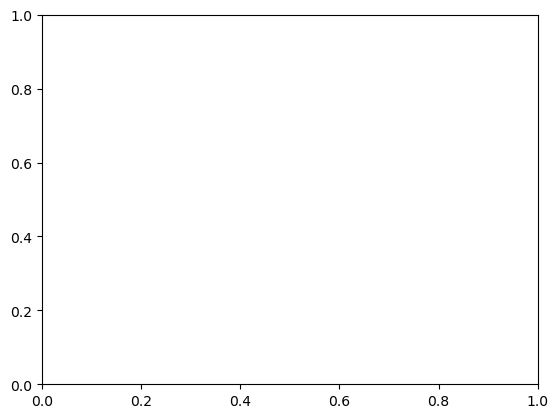

In [28]:
plt.scatter(X_test,y_test)